# PREDICTION OF THE STRENGTH OF CONCRETE

In [74]:
#crearing working directory
import os
os.chdir("E:\Data Analytics\Kaggle\StrengthOfConcrete")

In [75]:
os.getcwd()

'E:\\Data Analytics\\Kaggle\\StrengthOfConcrete'

In [76]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [77]:
#load the data
data = pd.read_csv("Concrete_Data.csv")

In [78]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [79]:
data.shape

(1030, 9)

#### this dataset contains 9 columns (or features) and 1030 observation
#### "csMPa" is dependent feature and other 8 are independent features

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Out of 9 variable Data type of 8 variable is float and 1 is integer.
#### this dataset does not contains any missing values as all of features contains 1030 entries (as number of observation is also 1030). As the dataset contains only 9 featues we can easily found out .

#### let's discuss about all the features.. Little bit of knowledge about features will help in analyzing the data more properly..
1. "cement" : is quantitative feature.It is a component of Concrete. Observations in this feature implies quantity of Cement
2. "slag" : is quantitative feature.It is also a cement kind of thing.It is a component of Concrete.Observations in this feature implies its quantity.
3. "flyash" : is quantitative feature.It is a component of Concrete. Observations in this feature implies its quantity.
4. "water" : is quantitative feature.It is a component of Concrete. Observations in this feature implies its quantity.
5. "superplasticizer" : is quantitative feature.It is a component of Concrete used to make high strength concrete.Observations in this feature implies its quantity.
6. "coarseaggregate" :  is quantitative feature.It is a component of Concrete.also known as Stone chips of certain measures.Observations in this feature implies its quantity.
7. "fineaggregate" : is quantitative feature.It is a component of Concrete. Known as Sand.Observations in this feature implies its quantity.
8. "age" : is quantitative feature. Age of the concrete define by this.
9. "csMPa" : is quantitative feature.It is the measure of strength of concrete.

## Outlier Checking
#### at a time one feature

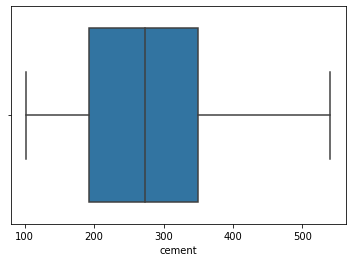

In [81]:
sns.boxplot(data["cement"])

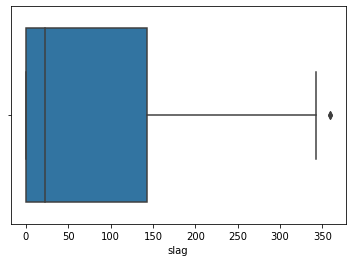

In [82]:
sns.boxplot(data["slag"])

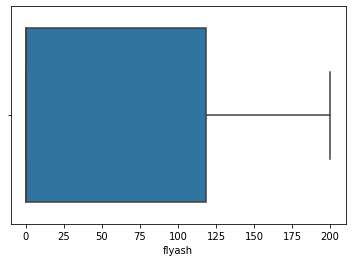

In [83]:
sns.boxplot(data["flyash"])

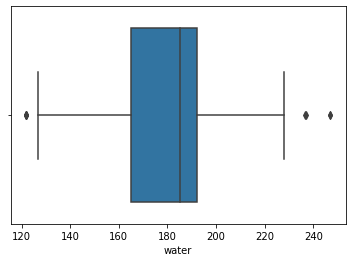

In [84]:
sns.boxplot(data["water"])

In [85]:
print("Maximum value in the feature water:" ,data["water"].max())
print("Minimum value in the feature water:" ,data["water"].min())

Maximum value in the feature water: 247.0
Minimum value in the feature water: 121.8


#### So it look like these outliers are not an issue

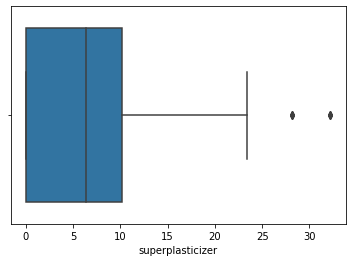

In [86]:
sns.boxplot(data["superplasticizer"])

In [87]:
print("Mean:" , data["superplasticizer"].mean())
print("Max:" , data["superplasticizer"].max())
print("quantile(95% , 97.5% , 99% respectively):" , data["superplasticizer"].quantile([0.95,0.975,0.99]))

Mean: 6.204660194174757
Max: 32.2
quantile(95% , 97.5% , 99% respectively): 0.950    16.055
0.975    18.655
0.990    23.400
Name: superplasticizer, dtype: float64


In [88]:
data2 = data[data.superplasticizer > 23.4]
print("Number of observation with values greater than 99% quartile:" , data2.shape[0])

Number of observation with values greater than 99% quartile: 10


#### So we remove this 1.54% data from "superplasticizer" column

In [89]:
data = data[data.superplasticizer <= 23.4]
data.shape

(1020, 9)

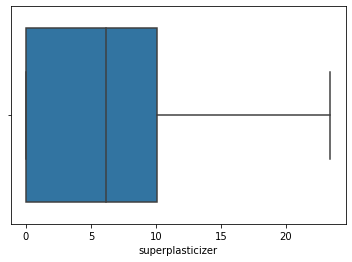

In [90]:
# Now check outlier
sns.boxplot(data["superplasticizer"])

#### So we remove the outlier from the feature "superplasticizer"

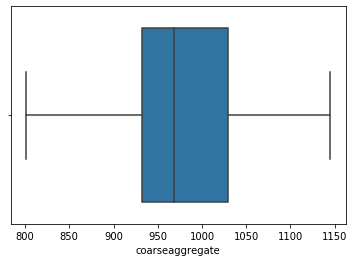

In [91]:
sns.boxplot(data["coarseaggregate"])

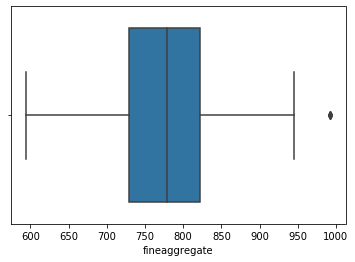

In [92]:
sns.boxplot(data["fineaggregate"])

In [93]:
data["fineaggregate"].sort_values(ascending = False).head(10)

166    992.6
97     992.6
120    992.6
74     992.6
143    992.6
551    945.0
542    945.0
543    945.0
545    945.0
714    943.1
Name: fineaggregate, dtype: float64

#### So it looks like this outlier is not an issue

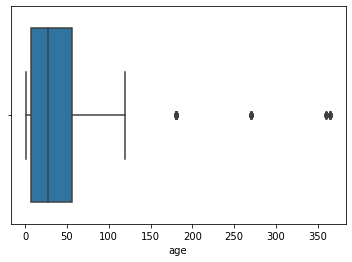

In [94]:
sns.boxplot(data["age"])

In [95]:
data["age"].sort_values(ascending = False).head(10)

30     365
31     365
622    365
3      365
24     365
620    365
6      365
34     365
41     365
610    365
Name: age, dtype: int64

In [96]:
df = data[data.age <= 165 ]

In [97]:
print(f"in order to remove outlier we remove {((len(data)-len(df))/len(data))*100} % data from our original dataset")

in order to remove outlier we remove 5.784313725490196 % data from our original dataset


In [98]:
print(f"Now the dataset contains {df.shape[0]} nos observation")

Now the dataset contains 961 nos observation


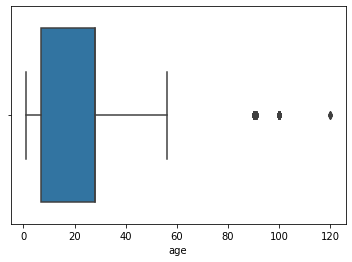

In [99]:
sns.boxplot(df["age"])

#### it contains few more outlier but let's not remove more rows as it may effect our model

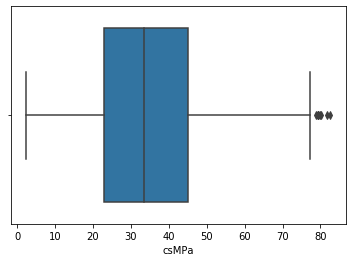

In [100]:
#checking outlier of dependent variable
sns.boxplot(df["csMPa"])

In [101]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85


In [102]:
df.shape

(961, 9)

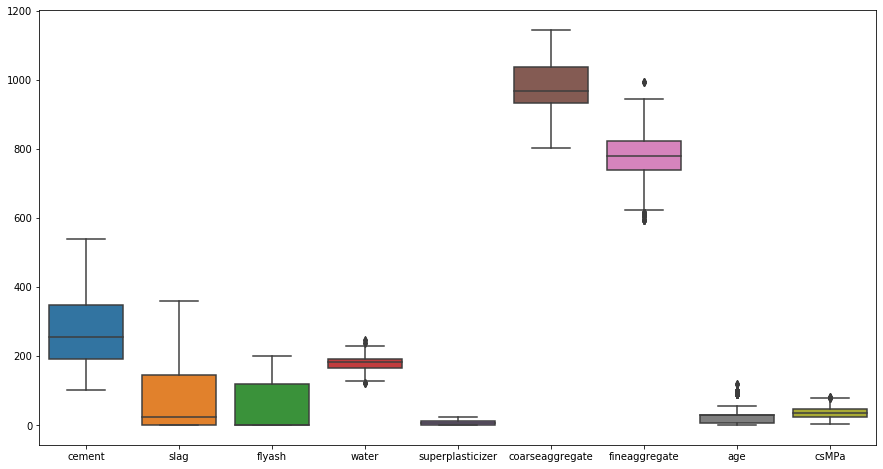

In [103]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

### Multicollinearity

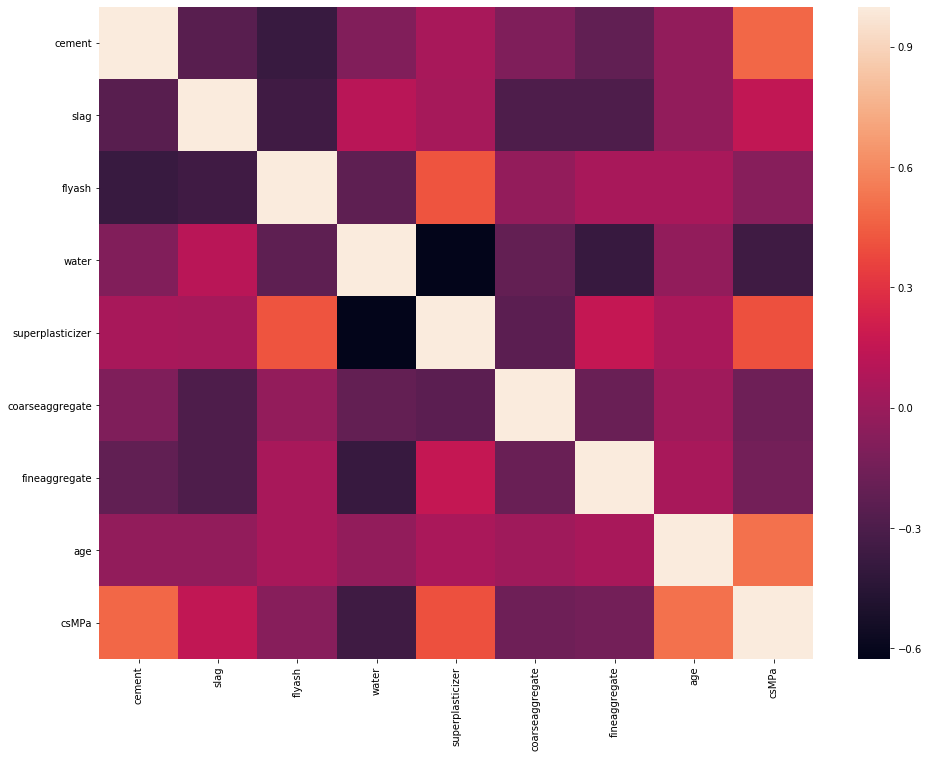

In [104]:
fig,ax = plt.subplots(figsize = (16,12))
corrMat = df.corr()
sns.heatmap(corrMat)

From the above correlation heatmap it is clear that no features are highly correlated to each other

## Splitting the dataset into the Training set and Test set

In [105]:
#dependent variable
y = df["csMPa"].values

In [106]:
#independent variables
x = df.iloc[:,:-1].values

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 42)

In [108]:
#We keep the values of t_test before scaling
y_val = y_test

## Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [110]:
#Converting 1D array to 2D array
y_train = y_train.reshape(len(y_train) , 1)
y_test= y_test.reshape(len(y_test) , 1)

In [111]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

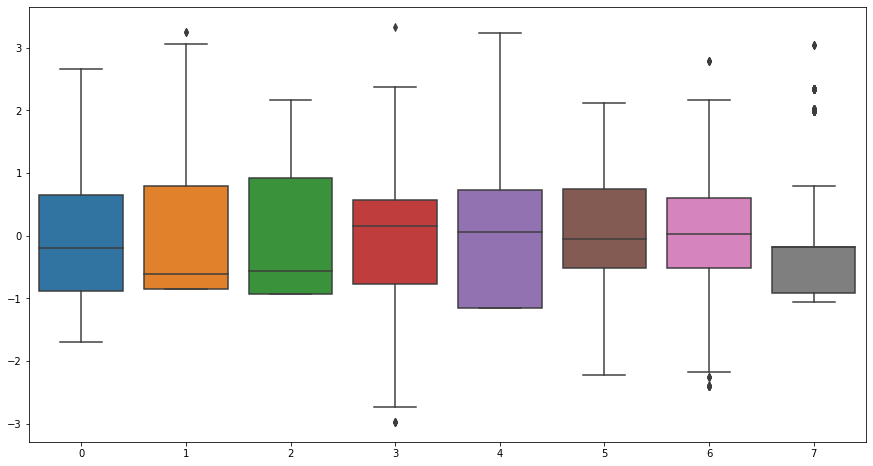

In [112]:
plt.figure(figsize=(15,8))
sns.boxplot(data=x_train)

# Modeling Part

In [113]:
y_train = pd.DataFrame(data = y_train[0:,0:],
                       index=[i for i in range(y_train.shape[0])],
                       columns = ["csMPa"])

In [114]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [115]:
x_train = pd.DataFrame(data = x_train[0:,0:],
                       index=[i for i in range(x_train.shape[0])],
                       columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer','coarseaggregate', 'fineaggregate', 'age'])

In [116]:
train = pd.concat([y_train , x_train] , axis = 1)

In [117]:
import statsmodels.formula.api as sm

In [118]:
lm = sm.ols(formula = 
"csMPa ~ cement + slag + flyash + water + superplasticizer + coarseaggregate + fineaggregate + age" , data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     235.7
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          1.07e-181
Time:                        10:23:42   Log-Likelihood:                -447.83
No. Observations:                 624   AIC:                             913.7
Df Residuals:                     615   BIC:                             953.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.006e-16      0.020  -5.03e-15      1.000      -0.039       0.039
cement               0.7348      0.052     14.152      0.000       0.633       0.837
slag                 0.4766      0.055      8.721      0.000       0.369       0.584
flyash               0.2840      0.050      5.649      0.000       0.185       0.383
water               -0.1955      0.049     -4.022      0.000      -0.291      -0.100
superplasticizer     0.0814      0.032      2.531      0.012       0.018       0.145
coarseaggregate      0.0363      0.045      0.800      0.424      -0.053       0.125
fineaggregate        0.0433      0.051      0.849      0.396      -0.057       0.143
age                  0.5096      0.020     25.361      0.000       0.470       0.549
==============================================================================
Omnibus:                       22.619   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.514
Skew:                           0.366   Prob(JB):                     6.43e-07
Kurtosis:                       3.748   Cond. No.                         8.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
#removing the ind veriable "coarseaggregate" as it has p value >0.05 and lesser t value
lm = sm.ols(formula = 
"csMPa ~ cement + slag + flyash + water + superplasticizer + fineaggregate + age" , data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     269.4
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          8.61e-183
Time:                        10:23:42   Log-Likelihood:                -448.16
No. Observations:                 624   AIC:                             912.3
Df Residuals:                     616   BIC:                             947.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.006e-16      0.020  -5.03e-15      1.000      -0.039       0.039
cement               0.7019      0.032     22.161      0.000       0.640       0.764
slag                 0.4413      0.032     13.749      0.000       0.378       0.504
flyash               0.2557      0.036      7.169      0.000       0.186       0.326
water               -0.2275      0.028     -8.228      0.000      -0.282      -0.173
superplasticizer     0.0730      0.030      2.402      0.017       0.013       0.133
fineaggregate        0.0091      0.028      0.328      0.743      -0.046       0.064
age                  0.5105      0.020     25.451      0.000       0.471       0.550
==============================================================================
Omnibus:                       21.928   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.648
Skew:                           0.358   Prob(JB):                     9.91e-07
Kurtosis:                       3.743   Cond. No.                         4.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
#removing the indp veriable "fineaggregate" as it has p value >0.05
lm = sm.ols(formula = 
"csMPa ~ cement + slag + flyash + water + superplasticizer + age" , data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     314.7
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          4.91e-184
Time:                        10:23:42   Log-Likelihood:                -448.21
No. Observations:                 624   AIC:                             910.4
Df Residuals:                     617   BIC:                             941.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.006e-16      0.020  -5.04e-15      1.000      -0.039       0.039
cement               0.6961      0.026     26.472      0.000       0.644       0.748
slag                 0.4352      0.026     16.600      0.000       0.384       0.487
flyash               0.2500      0.031      8.015      0.000       0.189       0.311
water               -0.2310      0.025     -9.060      0.000      -0.281      -0.181
superplasticizer     0.0750      0.030      2.529      0.012       0.017       0.133
age                  0.5104      0.020     25.468      0.000       0.471       0.550
==============================================================================
Omnibus:                       21.377   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.708
Skew:                           0.354   Prob(JB):                     1.59e-06
Kurtosis:                       3.725   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#VIF
var = pd.DataFrame(round(lm.pvalues,3))
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = lm.model.exog
vif = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif
var["vif"] = vif
var

,0,vif
Intercept,1.000,1.000000
cement,0.000,1.732410
slag,0.000,1.721891
flyash,0.000,2.438356
water,0.000,1.628966
superplasticizer,0.012,2.205583
age,0.000,1.006400


In [122]:
y_test = pd.DataFrame(data = y_test[0:,0:],
                       index=[i for i in range(y_test.shape[0])],
                       columns = ["csMPa"])

In [123]:
x_test = pd.DataFrame(data = x_test[0:,0:],
                       index=[i for i in range(x_test.shape[0])],
                       columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer','coarseaggregate', 'fineaggregate', 'age'])

In [124]:
#test = pd.concat([x_test , y_test] , axis = 1)
#test.head()

In [125]:
y_test["pred"] = lm.predict(x_test)
y_test.head()

,csMPa,pred
0,1.250102,1.072665
1,-0.107730,-0.428729
2,0.872427,-0.393878
3,1.871168,0.774468
4,-0.230625,-0.111771


In [126]:
pred1 = scaler.inverse_transform(y_test["pred"])

In [127]:
y_test["pred1"] = pred1

In [128]:
y_test["csMPa_inverse"] = scaler.inverse_transform(y_test["csMPa"])
y_test.head()

,csMPa,pred,pred1,csMPa_inverse
0,1.250102,1.072665,52.590181,55.55
1,-0.107730,-0.428729,27.545428,32.90
2,0.872427,-0.393878,28.126780,49.25
3,1.871168,0.774468,47.615956,65.91
4,-0.230625,-0.111771,32.832598,30.85


In [129]:
#now lets check inverse transform values of "csMPa_inverse" with y_val(y_test actual values) which I have keep previously
y_test["y_val"] = y_val
y_test.head()

,csMPa,pred,pred1,csMPa_inverse,y_val
0,1.250102,1.072665,52.590181,55.55,55.55
1,-0.107730,-0.428729,27.545428,32.90,32.90
2,0.872427,-0.393878,28.126780,49.25,49.25
3,1.871168,0.774468,47.615956,65.91,65.91
4,-0.230625,-0.111771,32.832598,30.85,30.85


Yes!!!! it works perfectly

In [130]:
#Defining MAPE(Mean Absolute Percentage Error) function
def MAPE(y_val,pred1):
    mape = np.mean(np.abs((y_val - pred1)/y_val))*100
    return mape

In [131]:
print("MAPE :",MAPE(y_val,pred1))

MAPE : 21.881122829729357


- Previously we got MAPE : 75.72 but by this approach we bring it down to 21.88.
- We will look into another approach soon
- for previous approach please see "StrengthOfConcrete-Copy1.ipynb" file